In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from math import log2

In [2]:
def graph_comp(df: DataFrame, I: int):
    # Group by the column and calculate the mean

    df = df[df['I'] == 2**I]
    fib_heap = df[df['Type'] == 'FibHeap'].drop(columns=['Type']).groupby('J').mean().reset_index()
    bin_heap = df[df['Type'] == 'BinHeap'].drop(columns=['Type']).groupby('J').mean().reset_index()

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(fib_heap['J'], fib_heap['Time'], marker='o', linestyle='-', color='blue', label='Colas de Fibonacci')
    plt.plot(bin_heap['J'], bin_heap['Time'], marker='o', linestyle='-', color='red', label='Heap')

    # Set labels and title
    plt.xlabel('Número de aristas')
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.title(f'Comparación del tiempo de ejecución (escala logarítmica)\n  2^{I} vértices')
    plt.legend()

    plt.xscale('log', base=2)
    plt.yscale('log', base=10)

    # Show the plot
    plt.show()

In [3]:
def linear_regresion(df: DataFrame, I: int, type: str):
    names = {'FibHeap': 'Colas de Fibonacci', 'BinHeap': 'Heap'}
    colors = {'FibHeap': 'blue', 'BinHeap': 'red'}

    df = df[df['Type'] == type].drop(columns=['Type'])
    df = df[df['I'] == 2**I].drop(columns=['I'])
    #df = df.groupby('J').mean().reset_index()
    #df.loc[:, 'I'] = df.loc[:,'I'].apply(lambda x: 2**x)

    # Preparar los datos para la regresión lineal
    X = df['J'].values.reshape(-1, 1)  # Valores de e (número de aristas)
    y = df['Time'].values  # Tiempos de ejecución

    X = df['J'].values.reshape(-1, 1)
    y = df['Time'].values

    # Perform linear regression on all data points
    model = LinearRegression()
    model.fit(X, y)

    # Get the regression coefficients
    pendiente = model.coef_[0]
    intersección = model.intercept_

    # Imprimir los resultados de la regresión
    #print(f"Pendiente: {pendiente}")
    #print(f"Intersección: {intersección}")
    print(f"{type}, I = {I}")
    print(f"Ecuación: y = {pendiente}x + {intersección}")

    # Realizar predicciones (opcional, para graficar la recta ajustada)
    y_pred = model.predict(X)

    plt.scatter(df['J'], df['Time'], color='green', alpha=0.5, label='Valores reales')
    plt.plot(X, y_pred, color=colors[type], label='Regresión lineal')

    # Graficar los resultados
    plt.xlabel('Número de aristas')
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.title(f'Regresión lineal para {names[type]} \n2^{I} vértices')
    #plt.xscale('log', base=2)
    #plt.yscale('log', base=10)

    plt.legend()
    plt.show()

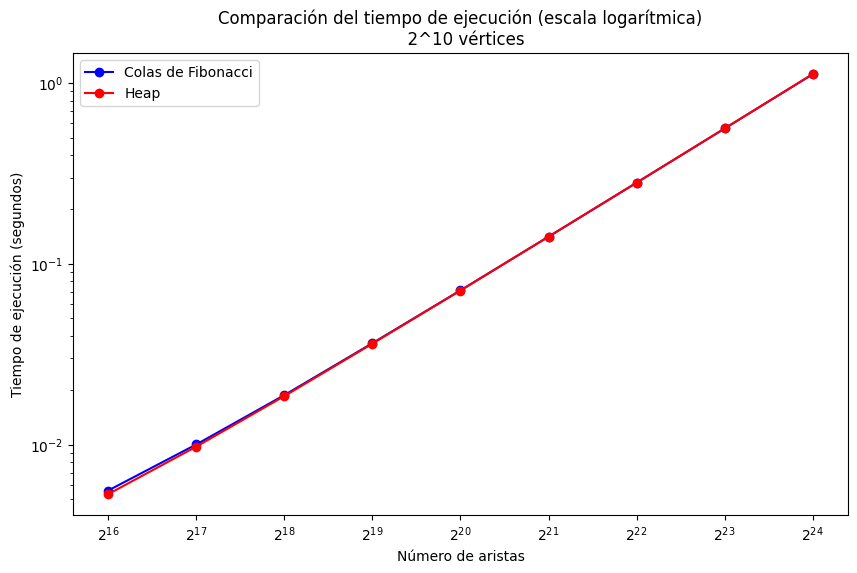

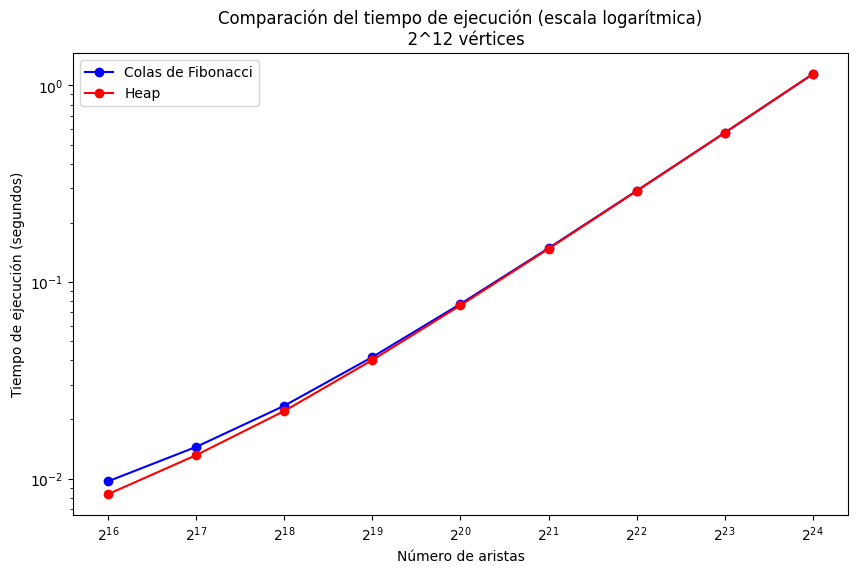

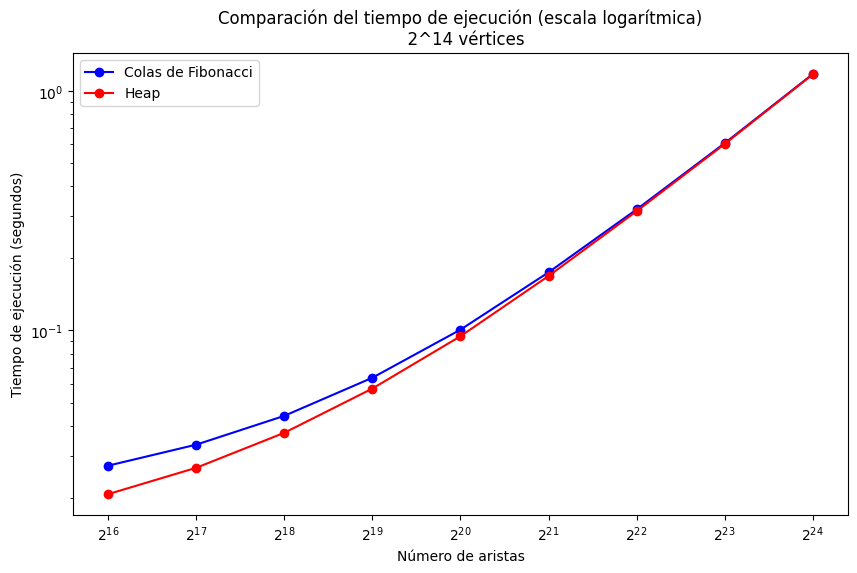

In [4]:
df : pd.DataFrame = pd.read_csv("results.csv")

df = df[df['J'] <= 24]
df = df[df['I'] != 'Graph']
df.loc[:, 'J'] = df.loc[:,'J'].apply(lambda x: 2**x)
df.loc[:, 'I'] = df.loc[:,'I'].apply(lambda x: 2**x)

df = df.sort_values(by=['I', 'J'])

graph_comp(df, 10)
graph_comp(df, 12)
graph_comp(df, 14)

FibHeap, I = 10
Ecuación: y = 6.670967209814014e-08x + 0.0013705968568092086


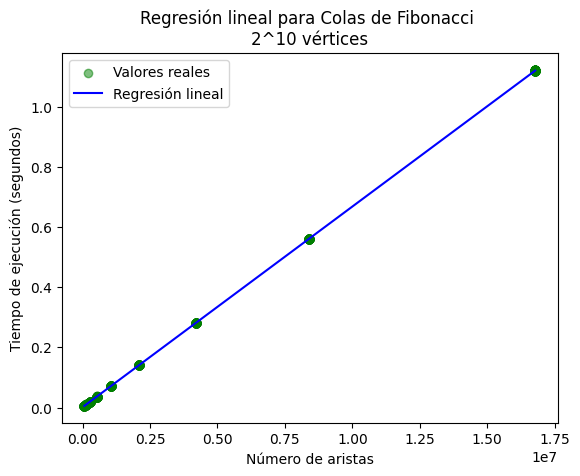

BinHeap, I = 10
Ecuación: y = 6.67693507769794e-08x + 0.0011621654935797532


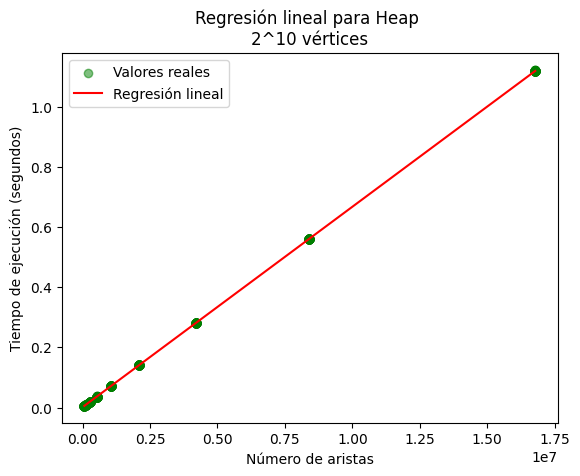

FibHeap, I = 12
Ecuación: y = 6.776180102377746e-08x + 0.00602448990466925


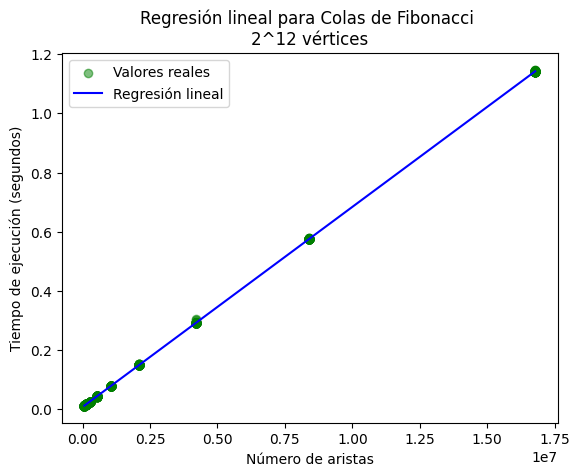

BinHeap, I = 12
Ecuación: y = 6.783507601603568e-08x + 0.004717382127431835


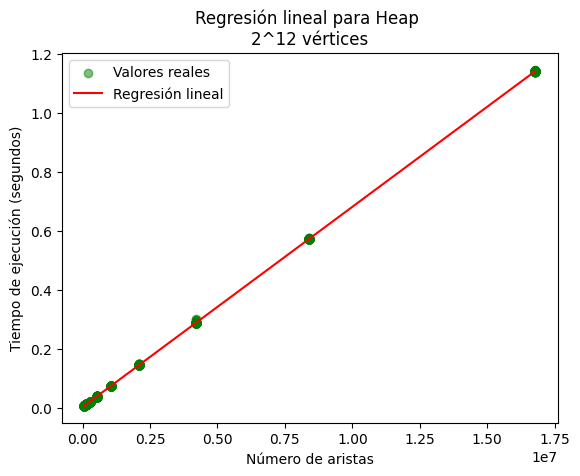

FibHeap, I = 14
Ecuación: y = 6.877498131983765e-08x + 0.027330385353112663


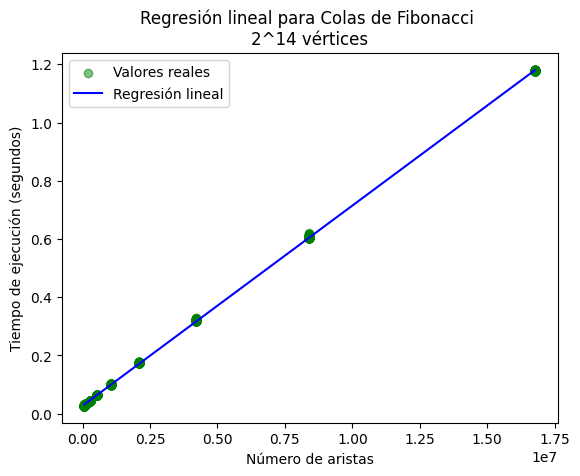

BinHeap, I = 14
Ecuación: y = 6.896027711231005e-08x + 0.02086893418385205


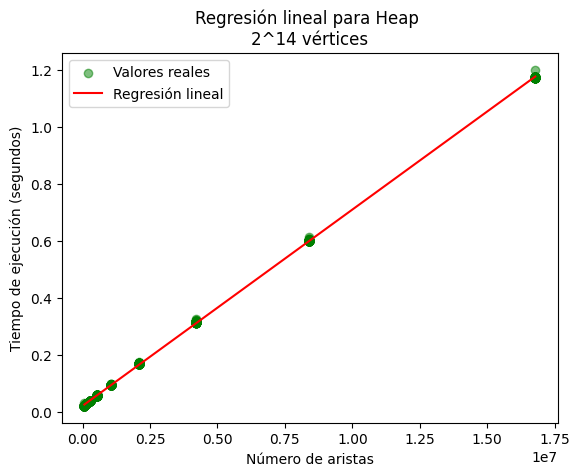

In [5]:
linear_regresion(df, 10, 'FibHeap')
linear_regresion(df, 10, 'BinHeap')
linear_regresion(df, 12, 'FibHeap')
linear_regresion(df, 12, 'BinHeap')
linear_regresion(df, 14, 'FibHeap')
linear_regresion(df, 14, 'BinHeap')